<h1 style="font-size: 48px; 
            font-family: Arial, sans-serif; 
            text-align: center; 
            font-weight: bold; 
            background: linear-gradient(to right, #FF5733, #FFC300, #DAF7A6); 
            -webkit-background-clip: text; 
            -webkit-text-fill-color: transparent; 
            padding: 20px;">
    2024 Shanghai University Ranking
</h1>


<h1 class="main-heading">Data Loading and Initial Exploration</h1>

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('shanghai_ranking_2024.csv')

# View the first few rows
df.head()


,Rank,University_Name,National/Regional Rank,Alumni,Award,Hici,N&S,PUB,PCP
0,1,Harvard University,1,100.0,97.1,100.0,100.0,100.0,85.7
1,2,Stanford University,2,45.3,88.1,73.1,83.9,73.1,59.6
2,3,Massachusetts Institute of Technology (MIT),3,71.9,82.8,55.2,70.8,59.1,73.6
3,4,University of Cambridge,1,78.2,90.8,45.1,59.8,67.2,60.6
4,5,"University of California, Berkeley",4,65.3,76.5,46.9,62.8,57.1,55.5


In [2]:
# Check data types of the columns
print("Data types of each column:")
print(df.dtypes)

# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Select only numeric columns for filling missing values
numeric_cols = df.select_dtypes(include=['number']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Fill missing values in non-numeric columns with mode
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


Data types of each column:
Rank                       object
University_Name            object
National/Regional Rank     object
Alumni                    float64
Award                     float64
Hici                      float64
N&S                       float64
PUB                       float64
PCP                       float64
dtype: object
Missing values in each column:
Rank                       0
University_Name            0
National/Regional Rank     0
Alumni                     0
Award                      0
Hici                       0
N&S                       11
PUB                        0
PCP                        0
dtype: int64


<h1 class="main-heading">Summary Statistics for Key Performance Indicators</h1>

In [4]:
# Summary statistics for each indicator
summary_stats = df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].describe()

# Display summary statistics
print(summary_stats)


            Alumni       Award         Hici          N&S          PUB  \
count  1000.000000  1000.00000  1000.000000  1000.000000  1000.000000   
mean      4.509600     3.78120    10.734400    10.575126    35.113000   
std      10.103201    11.45538    10.949265    10.578521    13.684495   
min       0.000000     0.00000     0.000000     0.000000     9.300000   
25%       0.000000     0.00000     0.000000     3.900000    25.775000   
50%       0.000000     0.00000     9.200000     7.400000    31.700000   
75%       0.000000     0.00000    14.600000    13.200000    41.425000   
max     100.000000   100.00000   100.000000   100.000000   100.000000   

               PCP  
count  1000.000000  
mean     19.655300  
std       8.800436  
min       8.600000  
25%      14.100000  
50%      17.600000  
75%      23.000000  
max     100.000000  


<h1 class="main-heading">Correlation Analysis Between Indicators</h1>

In [6]:
# Correlation matrix
correlation_matrix = df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].corr()
print(correlation_matrix)


          Alumni     Award      Hici       N&S       PUB       PCP
Alumni  1.000000  0.785131  0.485946  0.706852  0.380827  0.624922
Award   0.785131  1.000000  0.542474  0.747182  0.375987  0.679825
Hici    0.485946  0.542474  1.000000  0.786492  0.712207  0.646556
N&S     0.706852  0.747182  0.786492  1.000000  0.629403  0.758663
PUB     0.380827  0.375987  0.712207  0.629403  1.000000  0.464444
PCP     0.624922  0.679825  0.646556  0.758663  0.464444  1.000000


<h1 class="main-heading">Visualization: Correlation Heatmap</h1>

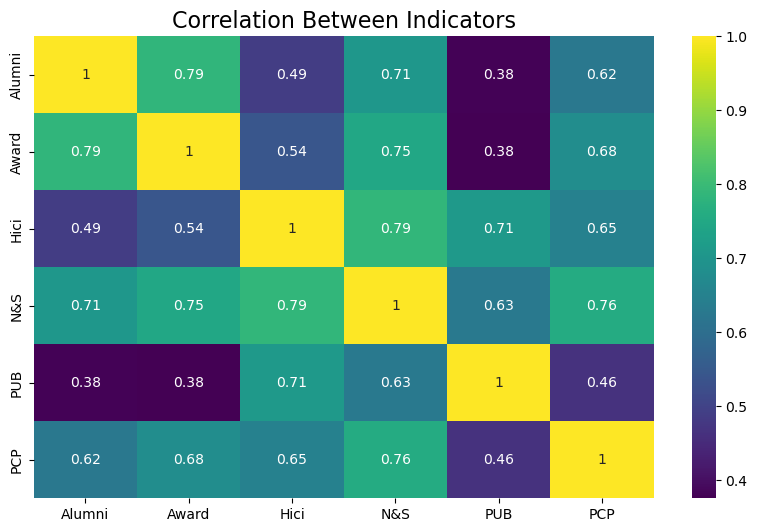

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap of correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title('Correlation Between Indicators', fontsize=16)
plt.show()


<h1 class="main-heading">Top 10 Universities by Global Rank</h1>

In [10]:
# Top 10 universities by global rank
top_10_universities = df[['Rank', 'University_Name', 'Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].head(10)


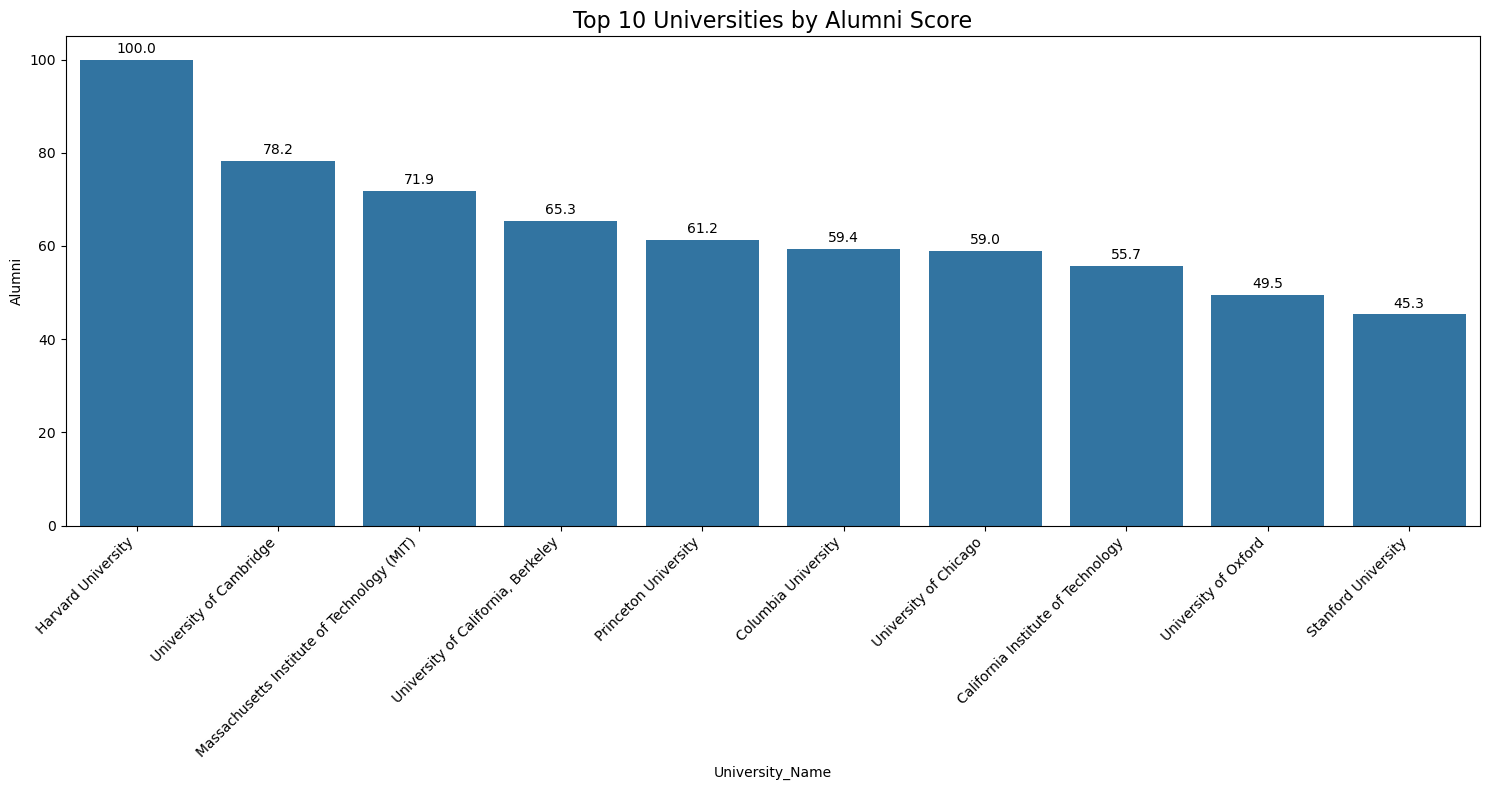

In [11]:
# Bar plot for Top 10 Universities by Alumni Score
plt.figure(figsize=(15, 8))
top_10_universities_sorted = top_10_universities.sort_values(by='Alumni', ascending=False)
bar_plot = sns.barplot(x='University_Name', y='Alumni', data=top_10_universities_sorted)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Universities by Alumni Score', fontsize=16)

# Add data labels
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=10, color='black', 
                      xytext=(0, 5), textcoords='offset points')

plt.tight_layout()
plt.show()


<h1 class="main-heading">National and Regional Rankings</h1>

In [13]:
# Group by National/Regional Rank
country_performance = df.groupby('National/Regional Rank')[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']].mean()
print(country_performance)


                           Alumni      Award       Hici        N&S        PUB  \
National/Regional Rank                                                          
1                       11.906667  10.088333  16.981667  16.638333  44.943333   
1-2                      6.550000   1.083333   5.233333   8.833333  41.600000   
1-3                      0.000000   0.000000   2.166667   4.133333  33.200000   
10                       8.440000   8.840000  20.660000  22.060000  49.440000   
11                       6.400000  12.040000  17.700000  14.600000  44.080000   
...                           ...        ...        ...        ...        ...   
9-11                     5.350000   2.166667   6.383333  11.200000  29.250000   
9-12                     5.243750   4.668750  14.587500  10.525000  39.793750   
9-15                     0.000000   0.000000  17.200000  11.585714  38.500000   
92-114                   0.000000   0.000000   5.991304   3.582609  35.721739   
99-114                   1.9

<h1 class="main-heading">Universities with the Highest PCP (Per Capita Performance)</h1>

In [18]:
# Sort universities by PCP Score
df_pcp_sorted = df.sort_values(by='PCP', ascending=False)
print(df_pcp_sorted[['University_Name', 'PCP']].head(10))


                                      University_Name    PCP
7                  California Institute of Technology  100.0
0                                  Harvard University   85.7
6                                Princeton University   75.3
28                             Rockefeller University   74.4
2         Massachusetts Institute of Technology (MIT)   73.6
3                             University of Cambridge   60.6
1                                 Stanford University   59.6
4                  University of California, Berkeley   55.5
86  The University of Texas M. D. Anderson Cancer ...   53.7
42                               Karolinska Institute   53.2


<h1 class="main-heading">Distribution and Visualization of Alumni Scores</h1>

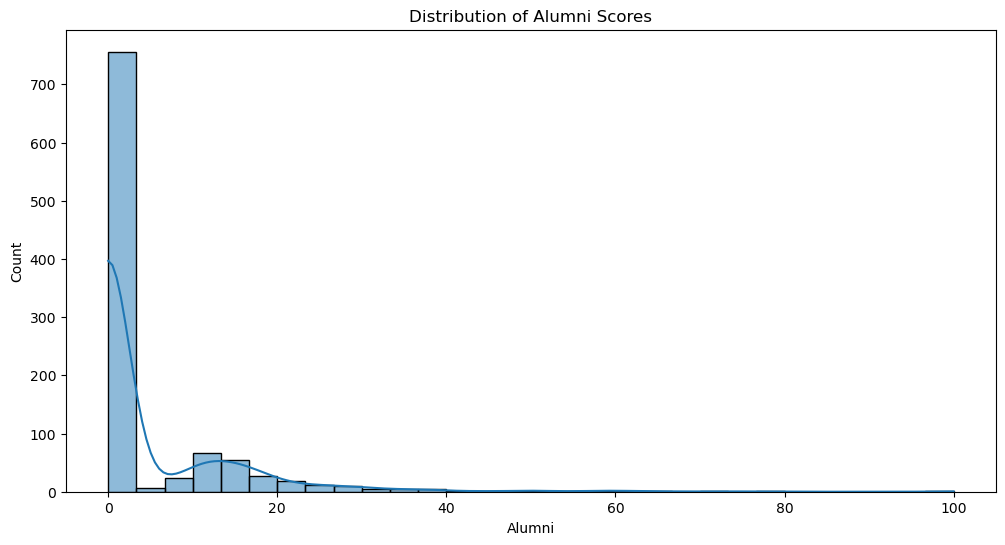

In [21]:
# Distribution of Alumni Scores
plt.figure(figsize=(12, 6))
sns.histplot(df['Alumni'], bins=30, kde=True)
plt.title('Distribution of Alumni Scores')
plt.show()


<h1 class="main-heading">Pairwise Relationships Between Indicators</h1>

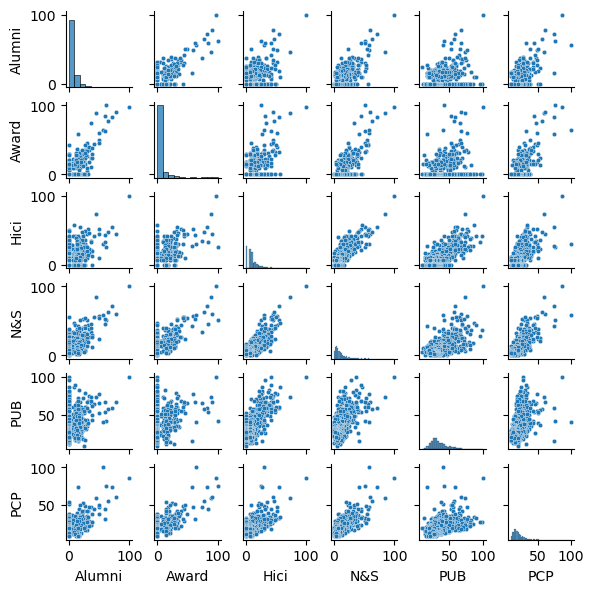

In [23]:
# Even more compact pairplot
sns.pairplot(df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']], height=1, plot_kws={'s': 10})
plt.show()


<h1 class="main-heading">Box Plots of Performance Indicators</h1>

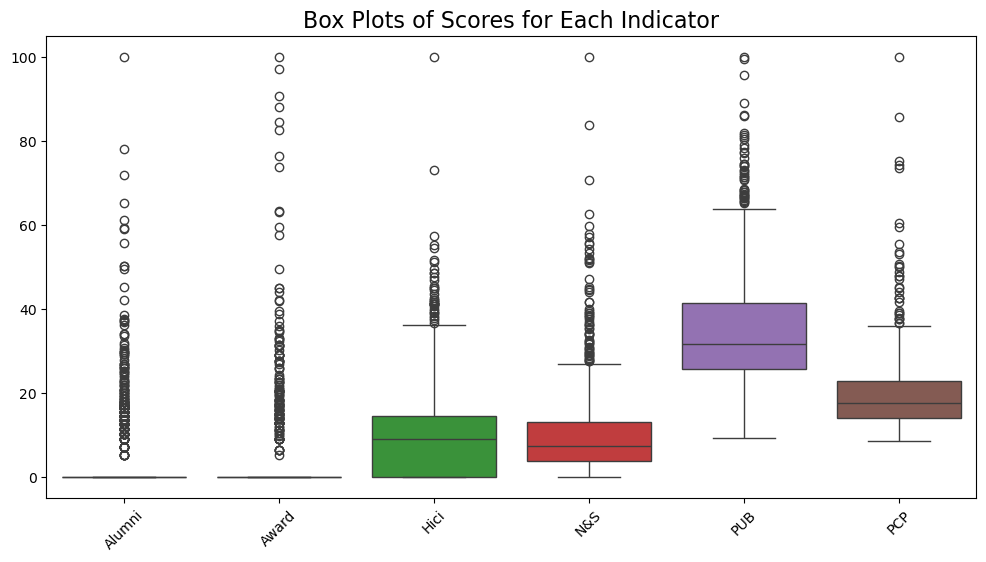

In [25]:
# Box Plots for Performance Indicators
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']])
plt.title('Box Plots of Scores for Each Indicator', fontsize=16)
plt.xticks(rotation=45)
plt.show()


<h1 class="main-heading">FacetGrid of Performance Indicator Distributions</h1>

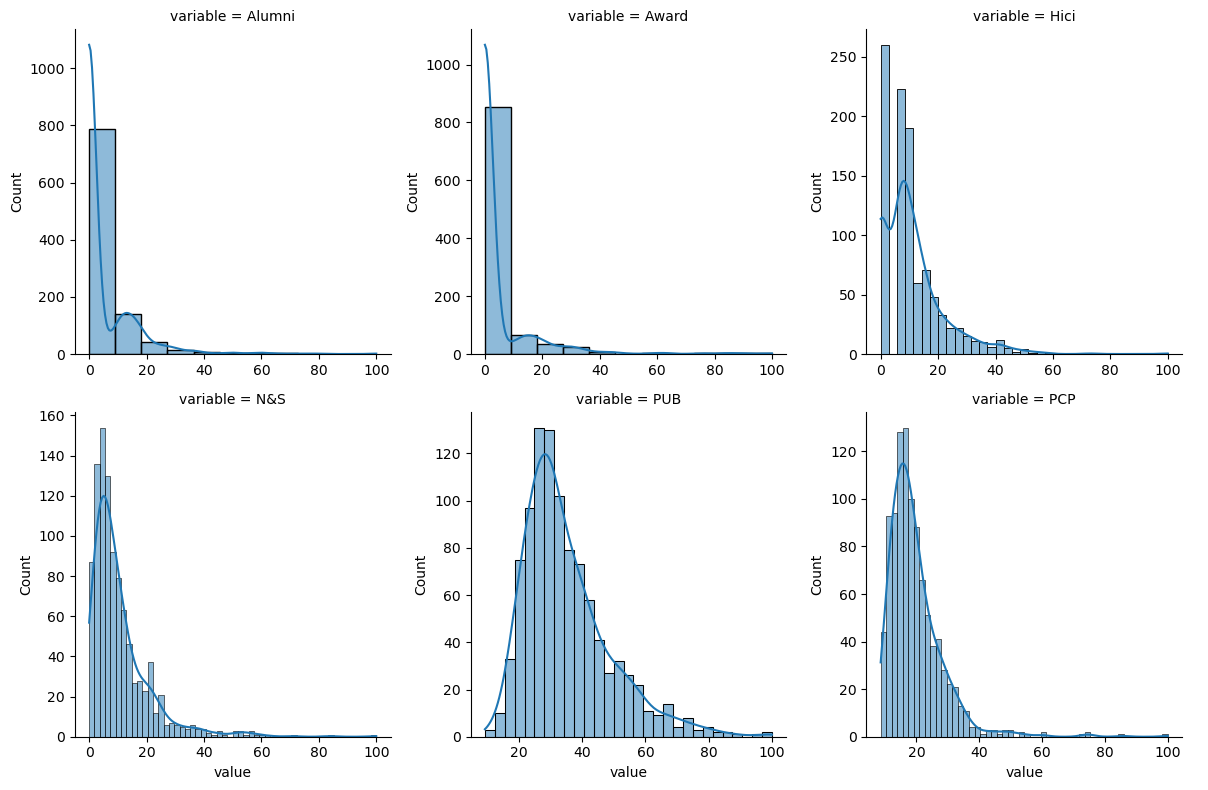

In [29]:
# Reshape and plot the distribution of each indicator
df_melted = pd.melt(df, id_vars=['University_Name'], value_vars=['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP'])

# Create FacetGrid for distribution of each indicator
g = sns.FacetGrid(df_melted, col='variable', col_wrap=3, height=4, sharex=False, sharey=False)
g.map(sns.histplot, 'value', kde=True)
g.add_legend()
plt.show()


<h2 style="text-align:center; color:#e74c3c; font-family:Arial, sans-serif;">Recommendations and Insights</h2>

<p style="font-family:Arial, sans-serif; font-size:14px; color:#2980b9;">
  Based on the analysis of the Shanghai Ranking 2024 dataset, we can derive the following insights and recommendations:
</p>

<ol style="font-family:Arial, sans-serif; font-size:14px; color:#e67e22; line-height:1.6;">
  <li>
    <strong>Elite Universities Dominating Across Multiple Indicators:</strong> 
    Institutions like Harvard, Stanford, MIT, and the University of Cambridge consistently score highly across key performance indicators such as Alumni, Award, Hici, and PCP.
    <br><em style="color:#d35400;">Recommendation:</em> Universities aiming to improve their global rankings should focus on enhancing these high-impact areas, including research output and citations (Hici), and alumni achievements (Alumni and Award scores).
  </li>
  <br>
  
  <li>
    <strong>Correlation Between Indicators:</strong>
    The correlation matrix reveals strong relationships between <em>Alumni</em>, <em>Award</em>, and <em>Hici</em> scores. This suggests that universities with notable alumni and awards tend to have strong research output and citation influence.
    <br><em style="color:#d35400;">Recommendation:</em> Institutions should leverage their alumni networks and support academic excellence to build a virtuous cycle of recognition and research output.
  </li>
  <br>

  <li>
    <strong>Focus on Research and Publications:</strong>
    The analysis shows that research performance (<em>N&S</em>, <em>PUB</em>) is a key factor for universities with a higher rank. Universities excelling in publication output tend to rank better globally.
    <br><em style="color:#d35400;">Recommendation:</em> Universities should invest in supporting faculty research, publication opportunities, and collaboration with industry to increase research output and global visibility.
  </li>
  <br>

  <li>
    <strong>PCP (Per Capita Performance) Insights:</strong>
    Smaller, research-intensive institutions like the California Institute of Technology have a high PCP score, indicating efficient resource utilization.
    <br><em style="color:#d35400;">Recommendation:</em> Larger institutions should focus on improving research productivity per capita by fostering an environment of innovation and resource allocation that supports individual researcher output.
  </li>
  <br>

  <li>
    <strong>National/Regional Rankings:</strong>
    Universities that rank high nationally or regionally tend to show significant strength in <em>Alumni</em> and <em>Award</em> categories, indicating their impact within local education systems.
    <br><em style="color:#d35400;">Recommendation:</em> Universities that want to improve their global standing should focus on enhancing international collaboration and cross-border academic partnerships to diversify their academic influence and reach.
  </li>
  <br>

  <li>
    <strong>Improve Alumni Networks and Recognition:</strong>
    Given the significant impact of the <em>Alumni</em> and <em>Award</em> scores on global rankings, universities should actively engage with their alumni networks and enhance programs that recognize and support alumni achievements.
    <br><em style="color:#d35400;">Recommendation:</em> Universities should establish formal mentorship and career support programs for alumni to foster long-term relationships and create pathways for alumni success that reflect positively on the institution.
  </li>
  <br>

  <li>
    <strong>Addressing Performance Gaps:</strong>
    The box plots and correlation heatmaps indicate that not all universities excel uniformly across all performance indicators.
    <br><em style="color:#d35400;">Recommendation:</em> Universities with lower scores in specific areas should identify their performance gaps and create targeted strategies to improve. For instance, institutions lagging in publications should invest in research funding, while those lacking in citations should focus on enhancing the global visibility of their research.
  </li>
</ol>

<h3 style="text-align:center; color:#e74c3c; font-family:Arial, sans-serif;">Conclusion</h3>

<p style="font-family:Arial, sans-serif; font-size:14px; color:#2980b9;">
  This analysis highlights the importance of holistic performance improvement across research output, alumni engagement, and faculty achievements. Universities aiming for higher global rankings should adopt a multi-faceted strategy focusing on enhancing both quantitative research metrics and qualitative measures such as alumni success and academic reputation.
</p>


C:\Users\JalalKhan\AppData\Local\Temp\ipykernel_18424\4117123708.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(


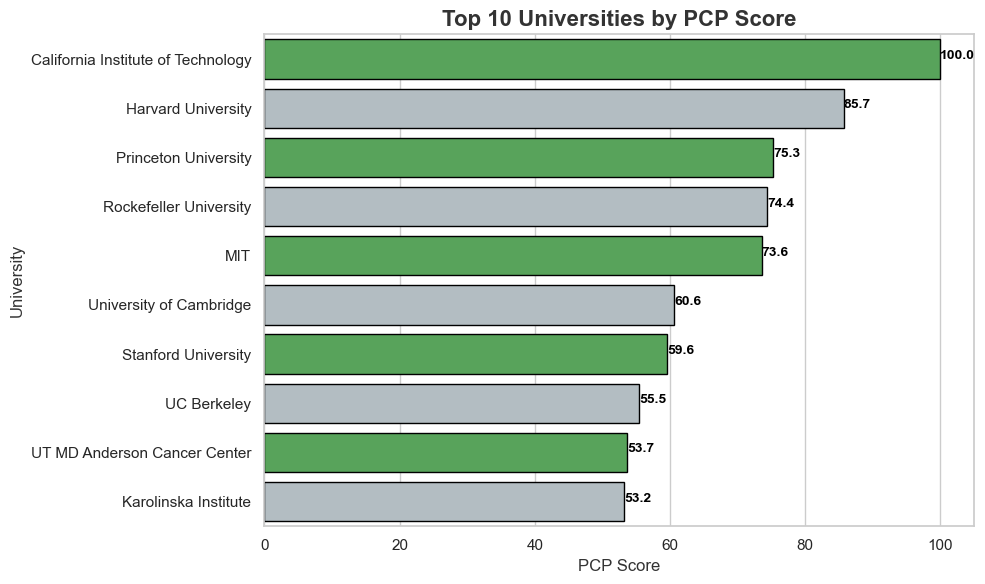

In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data of top universities by PCP score
data = {
    'University_Name': [
        'California Institute of Technology', 'Harvard University', 'Princeton University', 
        'Rockefeller University', 'MIT', 'University of Cambridge', 'Stanford University', 
        'UC Berkeley', 'UT MD Anderson Cancer Center', 'Karolinska Institute'
    ],
    'PCP': [100.0, 85.7, 75.3, 74.4, 73.6, 60.6, 59.6, 55.5, 53.7, 53.2]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Set up the style
sns.set(style="whitegrid")

# Create the bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x='PCP', 
    y='University_Name', 
    data=df, 
    palette=['#4CAF50' if i % 2 == 0 else '#B0BEC5' for i in range(len(df))],  # Alternate green and grey bars
    edgecolor='black'
)

# Add title and labels with styling
plt.title('Top 10 Universities by PCP Score', fontsize=16, weight='bold', color='#333333')
plt.xlabel('PCP Score', fontsize=12, color='#333333')
plt.ylabel('University', fontsize=12, color='#333333')

# Display PCP values on bars
for index, value in enumerate(df['PCP']):
    plt.text(value, index, f'{value}', color='black', ha="left", fontsize=10, weight='bold')

# Show plot
plt.tight_layout()
plt.show()


C:\Users\JalalKhan\AppData\Local\Temp\ipykernel_18424\3689628477.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='University_Name', y='Alumni', data=top_10_universities_sorted, palette=colors)


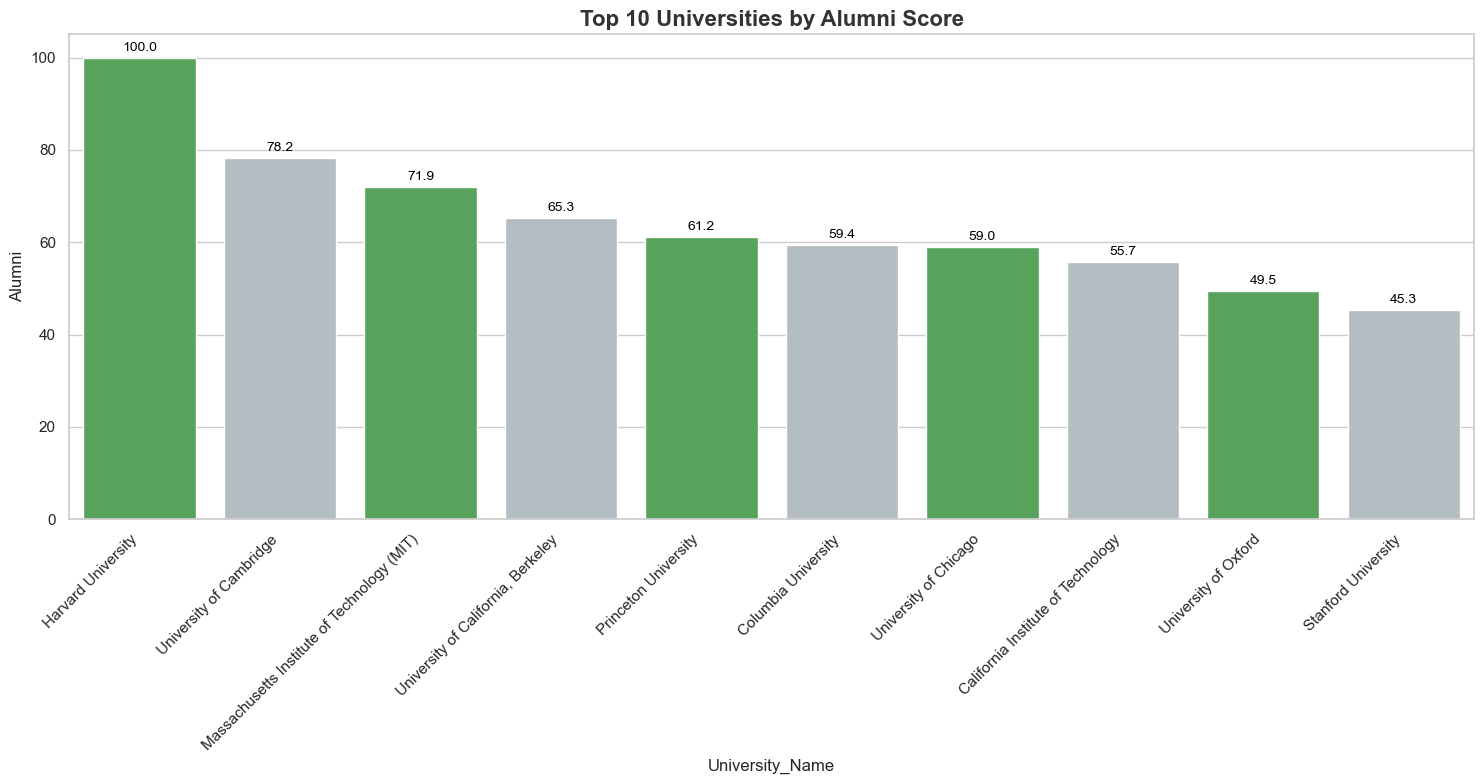

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'top_10_universities' DataFrame is already sorted by Alumni scores

plt.figure(figsize=(15, 8))

# Set up color palette with alternating green and grey
colors = ['#4CAF50' if i % 2 == 0 else '#B0BEC5' for i in range(len(top_10_universities_sorted))]

# Create bar plot with new color scheme
bar_plot = sns.barplot(x='University_Name', y='Alumni', data=top_10_universities_sorted, palette=colors)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')

# Add title with styling
plt.title('Top 10 Universities by Alumni Score', fontsize=16, weight='bold', color='#333333')

# Add data labels on each bar
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height():.1f}', 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha='center', va='baseline', fontsize=10, color='black', 
                      xytext=(0, 5), textcoords='offset points')

# Ensure the layout is tidy
plt.tight_layout()
plt.show()


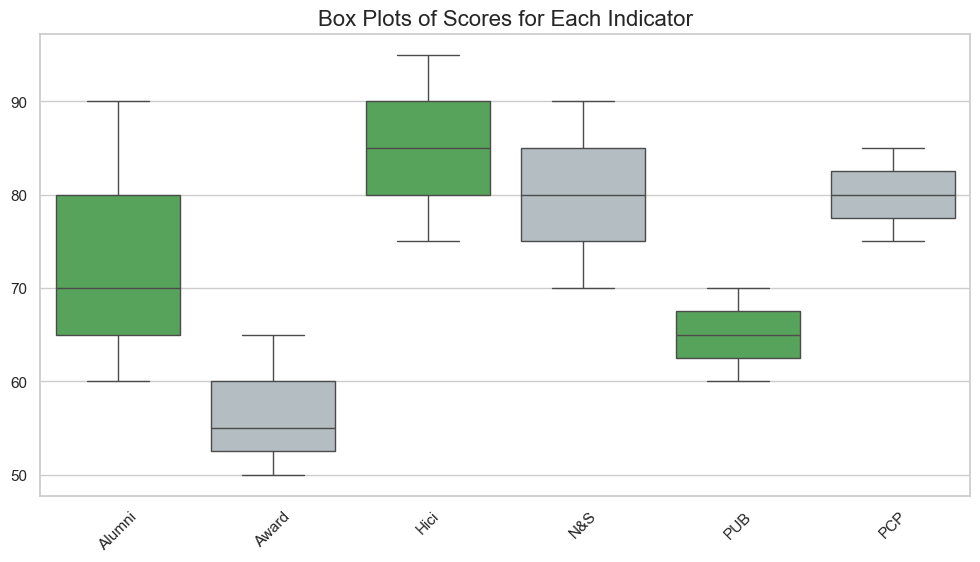

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create the box plots for performance indicators with a consistent color palette
plt.figure(figsize=(12, 6))
# Define the color palette with green and grey
palette = ['#4CAF50', '#B0BEC5', '#4CAF50', '#B0BEC5', '#4CAF50', '#B0BEC5']

# Create the box plot using the specified palette
sns.boxplot(data=df[['Alumni', 'Award', 'Hici', 'N&S', 'PUB', 'PCP']], palette=palette)
plt.title('Box Plots of Scores for Each Indicator', fontsize=16)
plt.xticks(rotation=45)
plt.show()


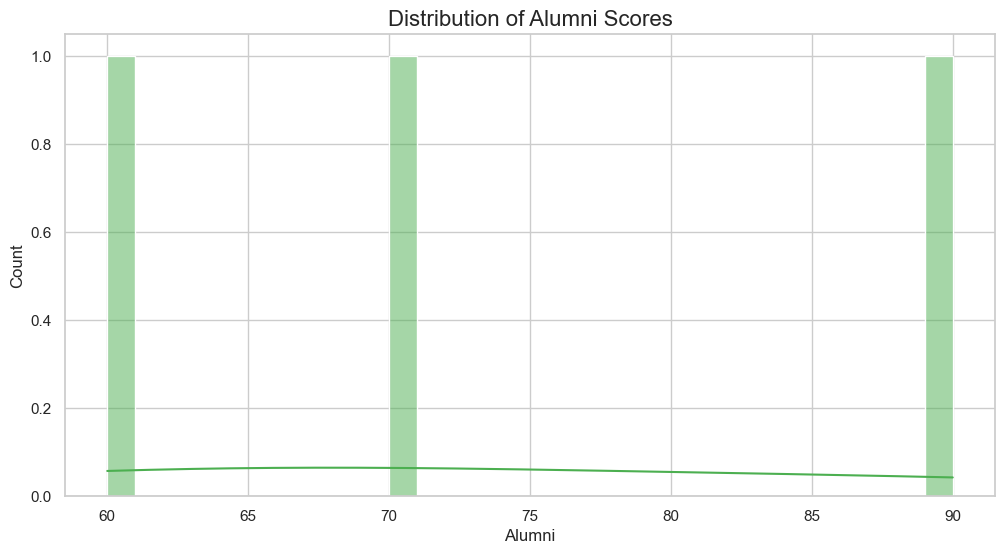

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 6))

# Create the histogram with customized colors
sns.histplot(df['Alumni'], bins=30, kde=True, color='#4CAF50', line_kws={'color': '#B0BEC5'})

# Set the title of the plot
plt.title('Distribution of Alumni Scores', fontsize=16)

# Show the plot
plt.show()
